<a href="https://colab.research.google.com/github/Saumya2005-dot/post-covid-ml-analysis/blob/main/Post_COVID_Effects_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
import pandas as pd

# Define full paths to your CSVs in Drive
economic_data_path = "/content/drive/MyDrive/ML_COVID_Project/economic_data.csv"
indian_data_path = "/content/drive/MyDrive/ML_COVID_Project/indian_data.csv"

# Load the datasets
df = pd.read_csv(economic_data_path)
df_india = pd.read_csv(indian_data_path)

# Combine both
df_combined = pd.concat([df, df_india], ignore_index=True)



# **1. Load Required Libraries**

In [4]:
!pip install seaborn pandas matplotlib scikit-learn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score


# **2. Upload the file**

In [15]:
from google.colab import files
uploaded = files.upload()


Saving economic_data.csv to economic_data.csv


# **3. Read the CSV**

In [5]:
import pandas as pd

df = pd.read_csv("economic_data.csv")
df.head()


,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.20%,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.20%,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.20%,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.10%,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.10%,audusd,0.6511,0.6684,0.6371,0.6666


# **4. Data Cleaning & EDA (Exploratory Data Analysis)**

# **4A:Data Cleaning**


In [6]:
# Copy of original data
data = df.copy()

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Remove '%' and convert relevant columns to float
percent_cols = ['interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']
for col in percent_cols:
    data[col] = data[col].str.replace('%', '').astype(float)

# Confirm changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country              432 non-null    object        
 1   date                 432 non-null    datetime64[ns]
 2   manufacturing pmi    432 non-null    float64       
 3   services pmi         432 non-null    float64       
 4   consumer confidence  432 non-null    float64       
 5   interest rates       432 non-null    float64       
 6   cpi yoy              432 non-null    float64       
 7   core cpi             432 non-null    float64       
 8   unemployment rate    432 non-null    float64       
 9   gdp yoy              432 non-null    float64       
 10  ticker               432 non-null    object        
 11  open                 432 non-null    float64       
 12  high                 432 non-null    float64       
 13  low                  432 non-null  

# **4B:Summary Statistics and Missing Values**


In [7]:
# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()


,0
country,0
date,0
manufacturing pmi,0
services pmi,0
consumer confidence,0
interest rates,0
cpi yoy,0
core cpi,0
unemployment rate,0
gdp yoy,0


# **4C: Correlation Heatmap**



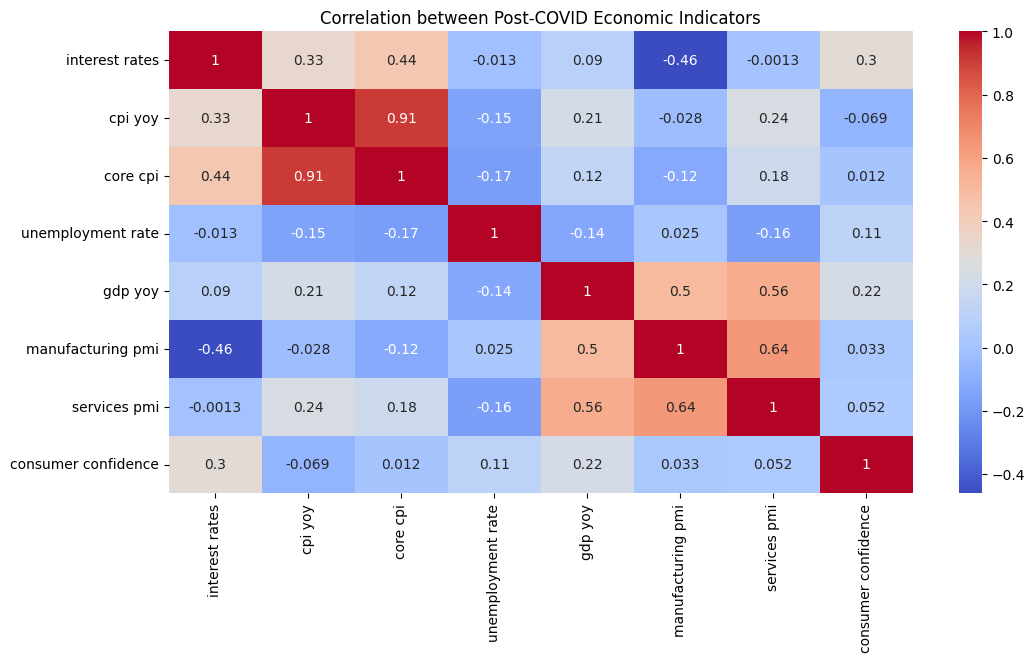

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(data[percent_cols + ['manufacturing pmi', 'services pmi', 'consumer confidence']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation between Post-COVID Economic Indicators")
plt.show()


# **4D: Line Plot – Unemployment & GDP Over Time**

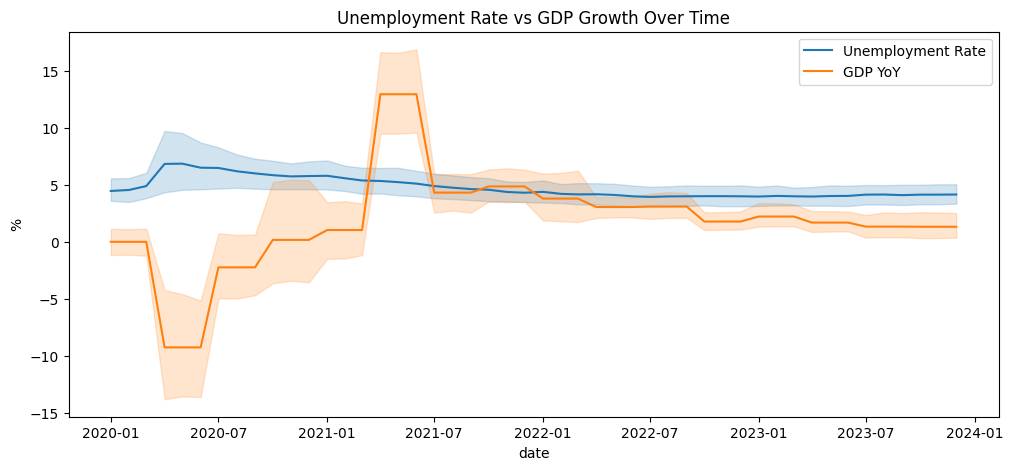

In [9]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='unemployment rate', data=data, label='Unemployment Rate')
sns.lineplot(x='date', y='gdp yoy', data=data, label='GDP YoY')
plt.title('Unemployment Rate vs GDP Growth Over Time')
plt.ylabel('%')
plt.legend()
plt.show()


## **5. Machine Learning Modeling**

# **5A: KMeans Clustering — Group similar economic patterns**

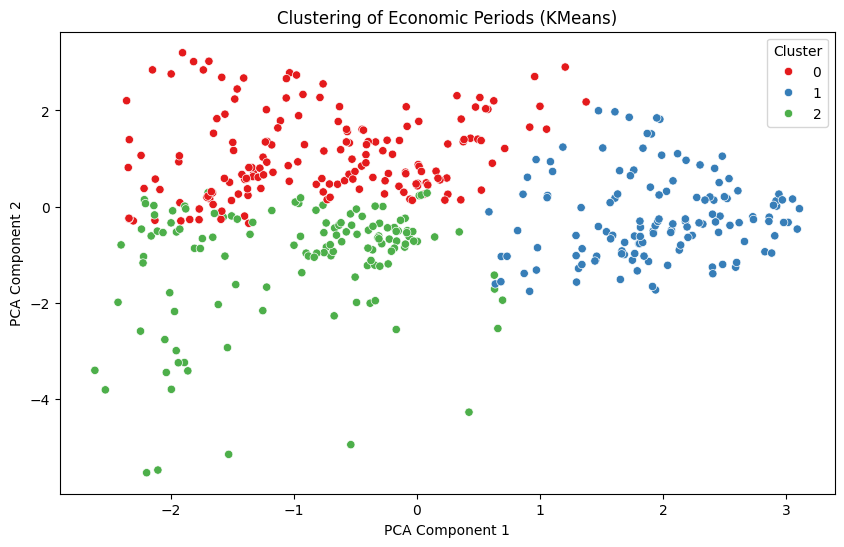

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Features for clustering
features = ['manufacturing pmi', 'services pmi', 'consumer confidence',
            'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Clustering of Economic Periods (KMeans)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# **5B:Linear Regression — Predict GDP growth**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data
X = data[features]
y = data['gdp yoy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.54
RMSE: 3.31


# **5C: Plot Actual vs Predicted GDP**

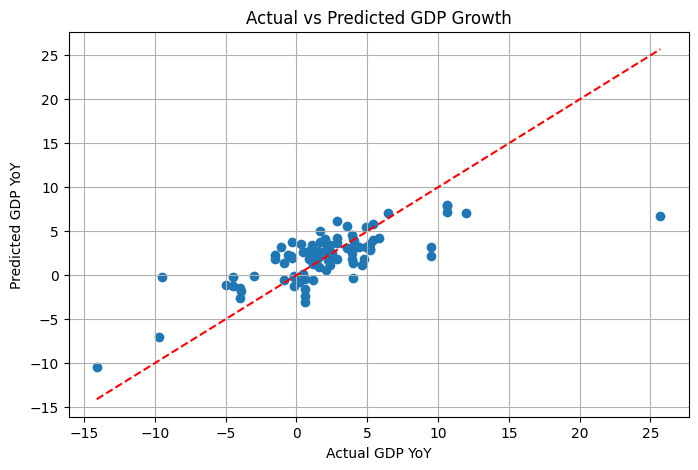

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GDP YoY')
plt.ylabel('Predicted GDP YoY')
plt.title('Actual vs Predicted GDP Growth')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()



# **6. Integration of India's Economic Data Post-COVID**
   *Since India's data is not available in the above uploaded dataset*

# **6A: Upload India’s Economic Data**

In [16]:
from google.colab import files
uploaded = files.upload()


Saving indian_data.csv to indian_data.csv


# **6B: Load the CSV into a DataFrame**

In [17]:
import pandas as pd

# Load the uploaded file
df_india = pd.read_csv('indian_data.csv')

# Display the first few rows
df_india.head()

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy
0,India,01-01-2020,51.3,53.3,94.1,5.15,7.59,4.0,7.6,3.6
1,India,01-04-2020,27.4,5.4,55.5,4.40,5.84,4.2,23.5,-23.9
2,India,01-07-2020,46.0,34.2,61.7,4.00,6.73,5.1,11.0,-7.5
3,India,01-01-2021,57.7,52.8,64.9,4.00,4.06,5.6,6.5,1.6
4,India,01-01-2022,54.0,55.5,71.3,4.00,6.01,6.0,7.1,4.1


# **6C: View India Data Columns**

In [18]:
df_india.info()
df_india.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              6 non-null      object 
 1   date                 6 non-null      object 
 2   manufacturing pmi    6 non-null      float64
 3   services pmi         6 non-null      float64
 4   consumer confidence  6 non-null      float64
 5   interest rates       6 non-null      float64
 6   cpi yoy              6 non-null      float64
 7   core cpi             6 non-null      float64
 8   unemployment rate    6 non-null      float64
 9   gdp yoy              6 non-null      float64
dtypes: float64(8), object(2)
memory usage: 612.0+ bytes


,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy
0,India,01-01-2020,51.3,53.3,94.1,5.15,7.59,4.0,7.6,3.6
1,India,01-04-2020,27.4,5.4,55.5,4.40,5.84,4.2,23.5,-23.9
2,India,01-07-2020,46.0,34.2,61.7,4.00,6.73,5.1,11.0,-7.5
3,India,01-01-2021,57.7,52.8,64.9,4.00,4.06,5.6,6.5,1.6
4,India,01-01-2022,54.0,55.5,71.3,4.00,6.01,6.0,7.1,4.1


# **6D: Clean and Align India's Data with the Global Dataset**

In [19]:
import numpy as np

# Standardize percentage columns (optional)
percentage_columns = ['interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']
for col in percentage_columns:
    df_india[col] = df_india[col].astype(str) + '%'

# Format date
df_india['date'] = pd.to_datetime(df_india['date'], dayfirst=True).dt.strftime('%Y-%m-%d')

# Add missing columns for consistency
df_india['ticker'] = 'inr'
df_india['open'] = np.nan
df_india['high'] = np.nan
df_india['low'] = np.nan
df_india['close'] = np.nan


#####################################################

In [ ]:
import pandas as pd

# Load the global dataset
df = pd.read_csv('/content/economic data.csv')

# Optional: Preview the data
df.head()


,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.20%,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.20%,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.20%,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.10%,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.10%,audusd,0.6511,0.6684,0.6371,0.6666


In [ ]:
import numpy as np

# Load your India dataset
df_india = pd.read_csv('/content/indian_data.csv')

# Format percentage columns
percentage_columns = ['interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']
for col in percentage_columns:
    df_india[col] = df_india[col].astype(str) + '%'

# Reformat the date column to match
df_india['date'] = pd.to_datetime(df_india['date'], dayfirst=True).dt.strftime('%Y-%m-%d')

# Add missing columns for merging
df_india['ticker'] = 'inr'
df_india['open'] = np.nan
df_india['high'] = np.nan
df_india['low'] = np.nan
df_india['close'] = np.nan


In [ ]:
df_india.columns = df_india.columns.str.strip()


In [ ]:
percentage_columns = ['interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']
for col in percentage_columns:
    df_india[col] = df_india[col].astype(str) + '%'



In [ ]:
df_india['date'] = pd.to_datetime(df_india['date'], dayfirst=True)


In [ ]:
for col in percentage_columns:
    df_india[col] = df_india[col].str.replace('%', '').astype(float)


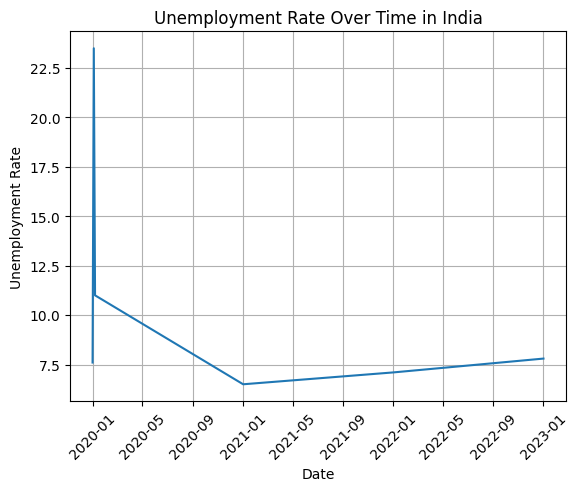

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_india['date'], df_india['unemployment rate'])
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time in India')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['manufacturing pmi', 'services pmi', 'consumer confidence',
            'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_india[features])


In [ ]:
df_india['date'] = pd.to_datetime(df_india['date'], dayfirst=True)


In [ ]:
percentage_columns = ['consumer confidence', 'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']
for col in percentage_columns:
    df_india[col] = df_india[col].astype(float)
X = df_india[['manufacturing pmi', 'services pmi', 'consumer confidence',
              'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate']]
y = df_india['gdp yoy']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


**Train Model (Random Forest Regressor)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: -0.19988611438016513
MSE: 226.85346849999993


## **Show Feature Importance**

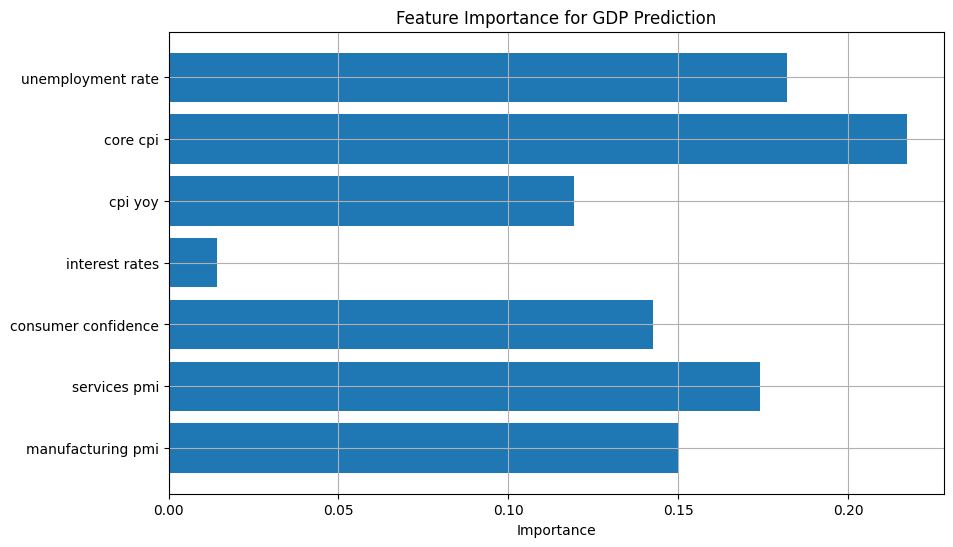

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importance for GDP Prediction')
plt.grid()
plt.show()


**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R² Score: 0.9276596838213793
Linear Regression MSE: 13.676841027520462


**Visualize Prediction vs Actual**

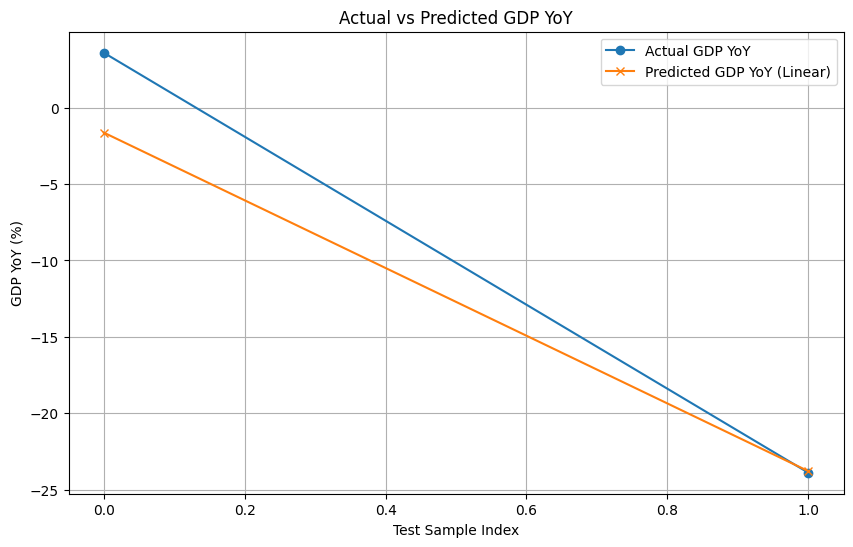

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual GDP YoY', marker='o')
plt.plot(y_pred_lr, label='Predicted GDP YoY (Linear)', marker='x')
plt.title('Actual vs Predicted GDP YoY')
plt.xlabel('Test Sample Index')
plt.ylabel('GDP YoY (%)')
plt.legend()
plt.grid(True)
plt.show()


# **Save model to file**

In [ ]:
import joblib

# Save Linear Regression model
joblib.dump(lr_model, 'gdp_linear_model.pkl')

# Save the scaler too for future use
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


# **Download on computer**

In [ ]:
from google.colab import files
files.download('gdp_linear_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **6E: Combine Both Datasets**